<a href="https://colab.research.google.com/github/smithakolan/Machine-learning-Tutorials/blob/main/bitcoin_price_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting bitcoin price data from CoinCap API

In [ ]:
import requests
import csv
import json

url = "http://api.coincap.io/v2/assets/bitcoin/history?interval=d1&start=1592585794000&end=1613753794000"

payload = {}
headers= {}

response = requests.request("GET", url, headers=headers, data = payload)

json_data = json.loads(response.text.encode('utf8'))


## Checking the json response

In [ ]:
print(json_data)

{'data': [{'priceUsd': '9312.2640975682276296', 'time': 1592611200000, 'date': '2020-06-20T00:00:00.000Z'}, {'priceUsd': '9360.6954642839445347', 'time': 1592697600000, 'date': '2020-06-21T00:00:00.000Z'}, {'priceUsd': '9485.7188617077539610', 'time': 1592784000000, 'date': '2020-06-22T00:00:00.000Z'}, {'priceUsd': '9643.1446484795214109', 'time': 1592870400000, 'date': '2020-06-23T00:00:00.000Z'}, {'priceUsd': '9455.9143261593911834', 'time': 1592956800000, 'date': '2020-06-24T00:00:00.000Z'}, {'priceUsd': '9245.4666343338491626', 'time': 1593043200000, 'date': '2020-06-25T00:00:00.000Z'}, {'priceUsd': '9195.0963322826828318', 'time': 1593129600000, 'date': '2020-06-26T00:00:00.000Z'}, {'priceUsd': '9121.5274044587510362', 'time': 1593216000000, 'date': '2020-06-27T00:00:00.000Z'}, {'priceUsd': '9068.8600027602995682', 'time': 1593302400000, 'date': '2020-06-28T00:00:00.000Z'}, {'priceUsd': '9126.3463933414662407', 'time': 1593388800000, 'date': '2020-06-29T00:00:00.000Z'}, {'priceUsd

### Storing the data we want

In [ ]:

bitcoin_data = json_data["data"]


## Storing the json data in a dataframe

In [ ]:
import pandas as pd

df = pd.DataFrame(bitcoin_data)
df.to_csv('bitcoin-usd.csv', index=False)

In [ ]:
print(df.sample)

<bound method NDFrame.sample of                    priceUsd           time                      date
0     9312.2640975682276296  1592611200000  2020-06-20T00:00:00.000Z
1     9360.6954642839445347  1592697600000  2020-06-21T00:00:00.000Z
2     9485.7188617077539610  1592784000000  2020-06-22T00:00:00.000Z
3     9643.1446484795214109  1592870400000  2020-06-23T00:00:00.000Z
4     9455.9143261593911834  1592956800000  2020-06-24T00:00:00.000Z
..                      ...            ...                       ...
240  47862.7378154633944688  1613347200000  2021-02-15T00:00:00.000Z
241  48845.9356663705238983  1613433600000  2021-02-16T00:00:00.000Z
242  50915.6299749834936216  1613520000000  2021-02-17T00:00:00.000Z
243  51904.8720715086917200  1613606400000  2021-02-18T00:00:00.000Z
244  53076.0589422965914757  1613692800000  2021-02-19T00:00:00.000Z

[245 rows x 3 columns]>


In [ ]:
import matplotlib.pyplot as plt
df.plot(x ='time', y='priceUsd', kind = 'line')
plt.show()

TypeError: ignored

## Identifying data types in our dataframe

In [ ]:
df.dtypes

priceUsd    object
time         int64
date        object
dtype: object

## Removing obsolete data column

In [ ]:
df = pd.DataFrame(bitcoin_data, columns=['time', 'priceUsd'])
print(df.sample)

<bound method NDFrame.sample of               time                priceUsd
0    1592611200000   9312.2640975682276296
1    1592697600000   9360.6954642839445347
2    1592784000000   9485.7188617077539610
3    1592870400000   9643.1446484795214109
4    1592956800000   9455.9143261593911834
..             ...                     ...
240  1613347200000  47862.7378154633944688
241  1613433600000  48845.9356663705238983
242  1613520000000  50915.6299749834936216
243  1613606400000  51904.8720715086917200
244  1613692800000  53076.0589422965914757

[245 rows x 2 columns]>


## Converting 'priceUsd' data from type object to float

In [ ]:
df['priceUsd'] = pd.to_numeric(df['priceUsd'], errors='coerce').fillna(0, downcast='infer')

In [ ]:
df.dtypes

time          int64
priceUsd    float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      245 non-null    int64  
 1   priceUsd  245 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.0 KB


## Plotting bitcoin price data

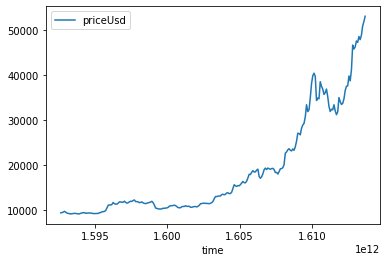

In [ ]:
df.plot(x ='time', y='priceUsd', kind = 'line')
plt.show()